In [20]:
from fol_IO import *
from helpers import *
from scipy.spatial.distance import *

In [309]:
# Remove centroids with no follicles
def remove_bbox_centroids(sd):
    to_del = []
    for sk in sd:
        for fk in sd[sk]:
            if 'outer' in sd[sk][fk].keys():
                if not (sd[sk][fk]['outer'] and sd[sk][fk]['centroid'].any()):
                    to_del.append((sk,fk))
            else:
                to_del.append((sk,fk))
    for d in to_del:
        del(sd[d[0]][d[1]])
def plot_all_fols(slice_dict,I_file):
    """
    Load an image and plot all the follicles. Seems buggy
    :param slice_dict: The tracked follicles in the slice_dict format
    :param I_file: An image file
    :return: None
    """
    I = io.imread(I_file)
    slice_num = int(re.search('_\d{4}\.',I_file).group()[1:-1])
    plt.figure(figsize=(10,10))
    plt.imshow(I,'gray')
    slice = slice_dict[slice_num]
    for fol in slice.itervalues():
        if 'inner' in fol.keys():
            inner = fol['inner']
        if 'outer' in fol.keys():
            outer = fol['outer']
        if 'centroid' in fol.keys():
            centroid = fol['centroid']
        bbox = fol['bbox']
        if bbox:
            coord,h,w = verts_to_patch_coords(*bbox)
            rect = patches.Rectangle(coord,w,h,facecolor='none',edgecolor='r',linewidth=3)
            plt.gca().add_patch(rect)
        if inner:
            plt.plot(inner[1],inner[0],'r.',markersize=1)
        if outer:
            plt.plot(outer[1],outer[0],'g.',markersize=1)
#         if (outer or inner) and centroid.any():
#             plt.plot(centroid[1], centroid[0], 'b.', markersize=10)
        if centroid.any():
            plt.plot(centroid[1], centroid[0], 'b.', markersize=10)
            
def rotate_by_deg(points, r):
    r = np.radians(r)
    rot = []
    cos_r, sin_r = np.cos(r), np.sin(r)
    for p in points:
        rot.append([p[0] * cos_r - p[1] * sin_r, p[0] * sin_r + p[1] * cos_r])
    return rot

def plot_centroids(points1,points2=None, too_close = None, shifted = True):
    plt.figure(figsize=(10,10))
    if shifted:
        plt.ylim(-2500,2500)
        plt.xlim(-2500,2500)
    else:
        plt.ylim(0,5000)
        plt.xlim(0,5000)
    
    if points2:
        for p in points2:
            plt.plot(p[1],p[0],'r.', markersize=10)
    for p in points1:
        plt.plot(p[1],p[0],'b.', markersize=10)
    if too_close:
        for t in too_close:
            plt.plot(t[1],t[0],'g.', markersize=10)

    plt.show()
    
# def closest(points):
#     for 
    
def translate(points, x, y):
    trans = []
    for p in points:
        trans.append([p[0] + x, p[1]+y])
    return trans
    
    
    
    

In [100]:
sd = load_fol_data(r'C:\Users\guru\Desktop\follicle_tracking\my.pckl')

In [102]:
sd.keys()

[32, 33, 34, 30, 31]

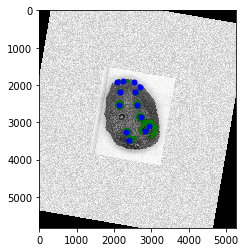

In [17]:
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0030.tif')

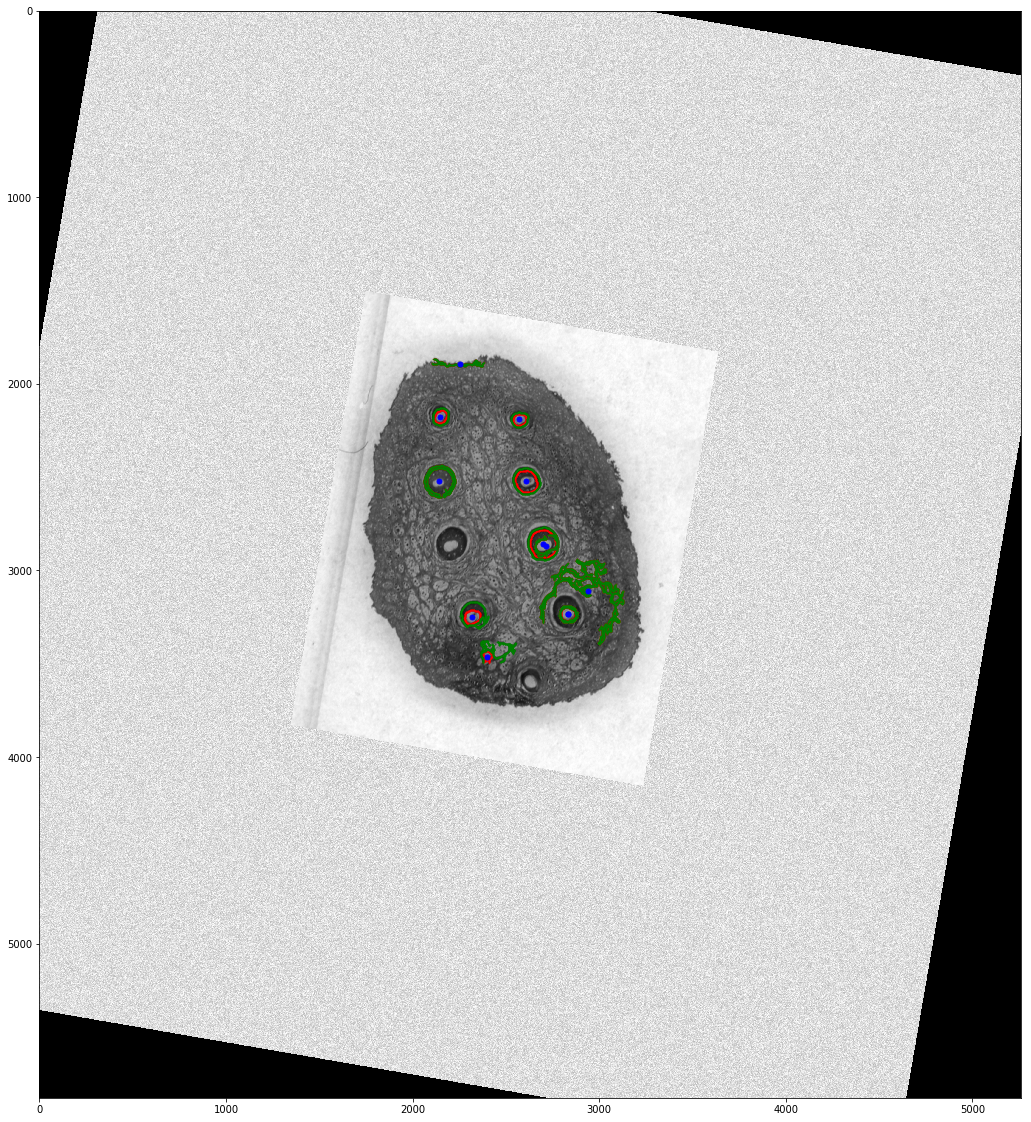

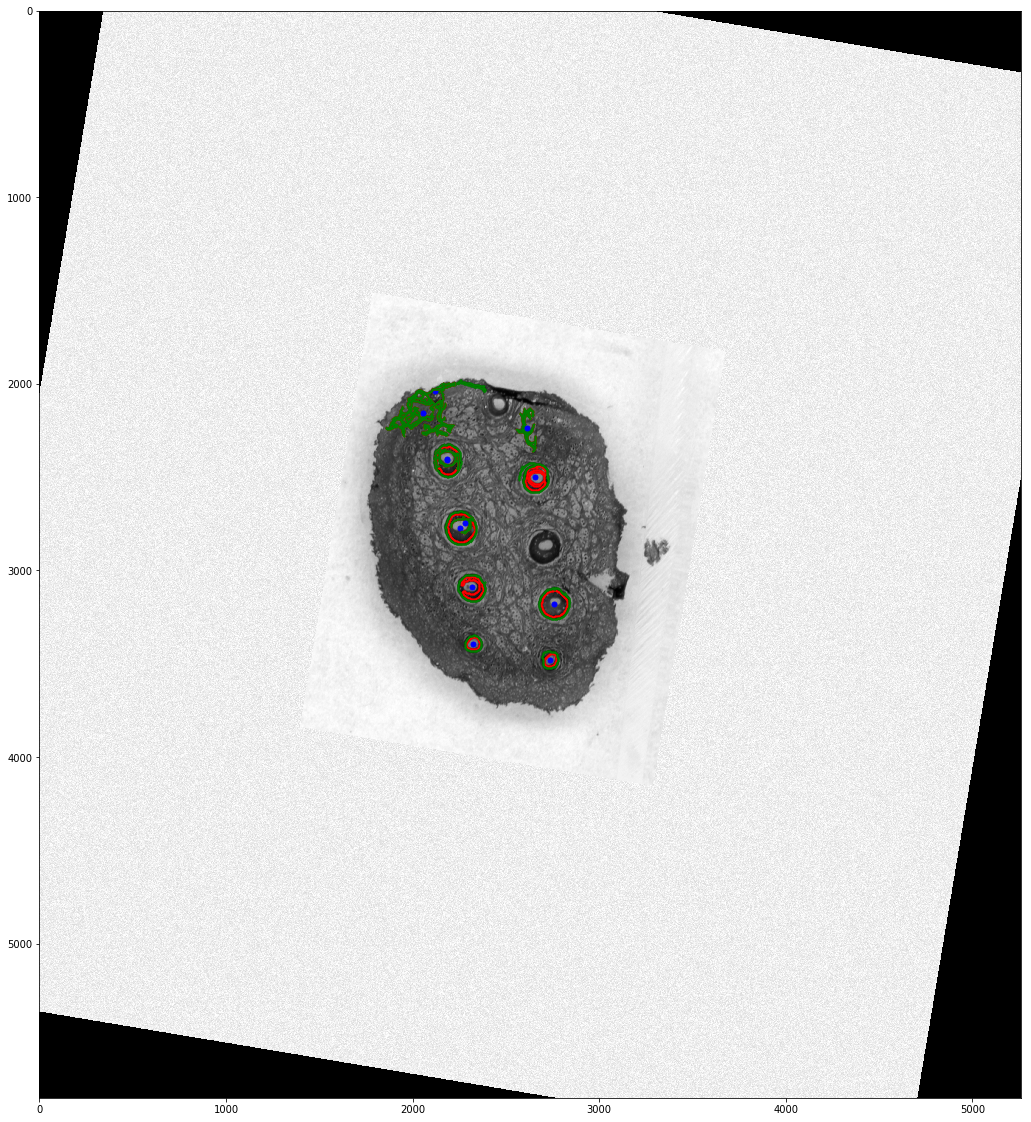

In [107]:
remove_bbox_centroids(sd)
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0030.tif')
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0031.tif')

In [263]:
%matplotlib qt

In [ ]:
%matplotlib inline

In [332]:
# HERE
# remove bbox centroids
# Show two images with fols and centroids
# press space to pass or 
# Click on two centroids that you want to line up
# find centroid nearest to click
# translate second image so centroids line up
# rotate 2nd image about chosen centroid to minimize median error

I_file = r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0033.tif'
I = io.imread(I_file)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121)
ay = fig.add_subplot(122)
ax.imshow(I,'gray')

I_file = r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0034.tif'
I = io.imread(I_file)
ay.imshow(I,'gray')

points = centroids[0]
for p in points:
    ax.plot(p[1],p[0], 'b.',markersize=10 )
    
points = centroids[1]
for p in points:
    ay.plot(p[1],p[0], 'b.',markersize=10 )

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [311]:
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0033.tif')

single click: button=1, x=516, y=501, xdata=2656.173075, ydata=2840.868384


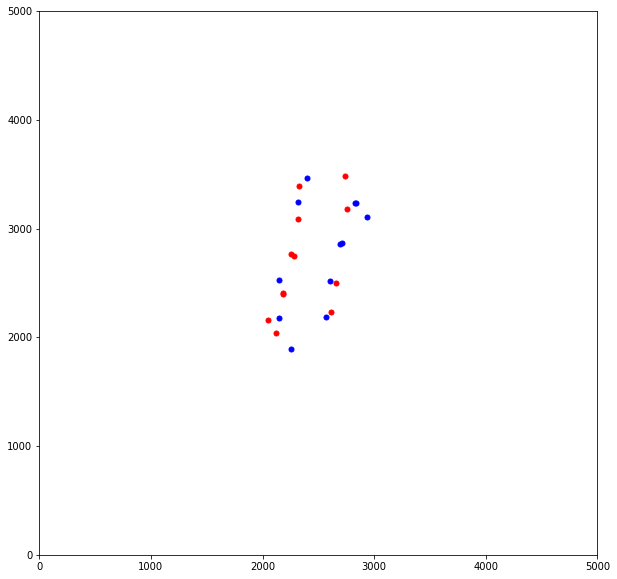

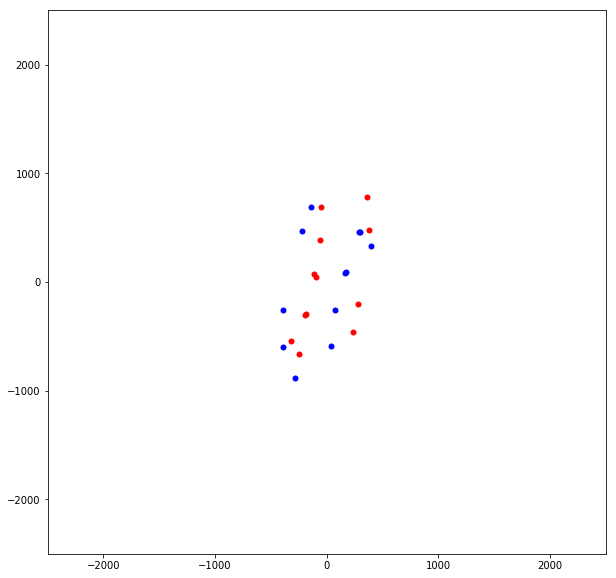

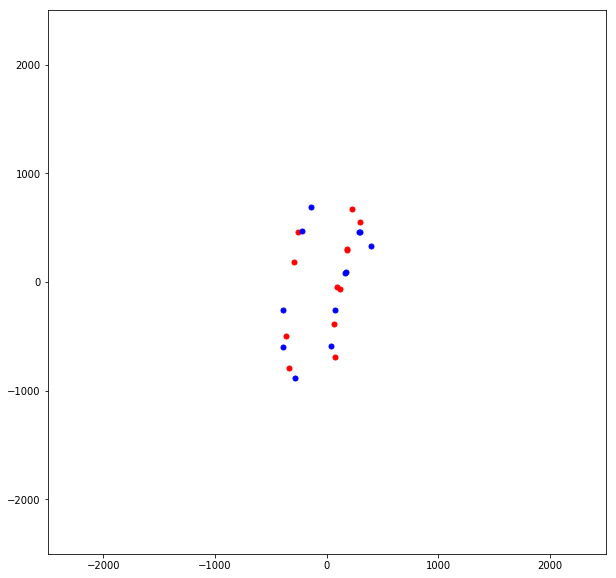

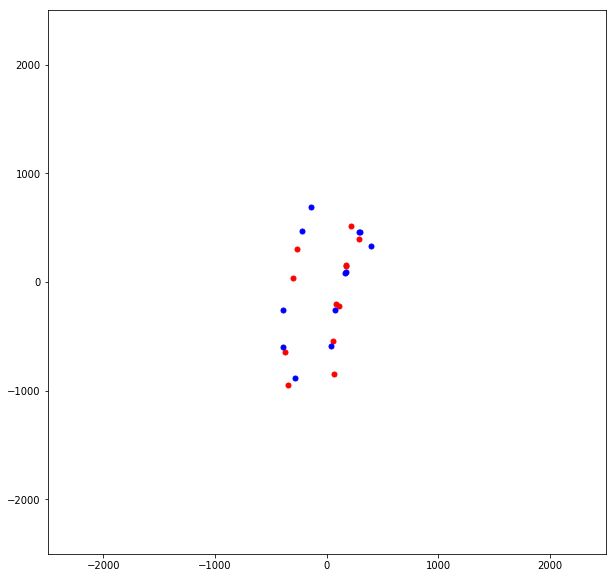

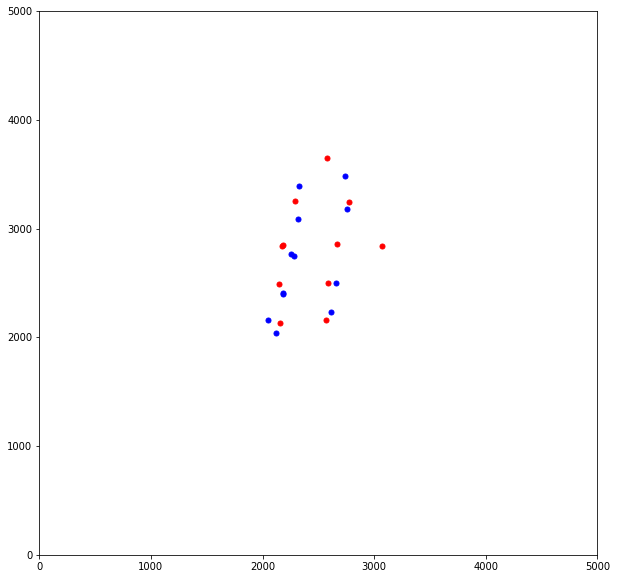

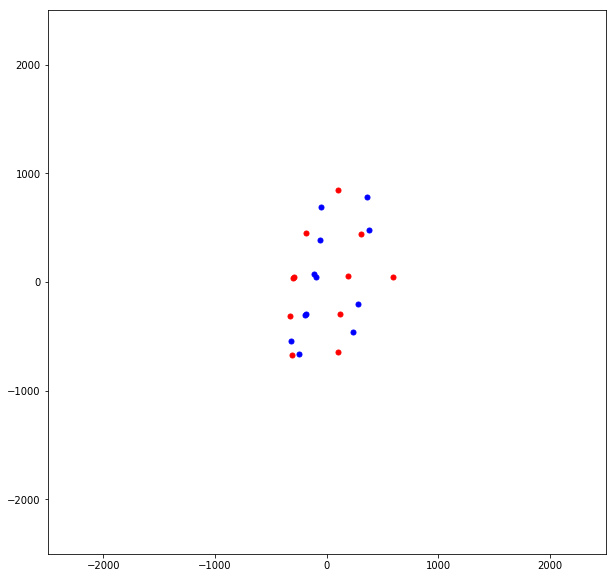

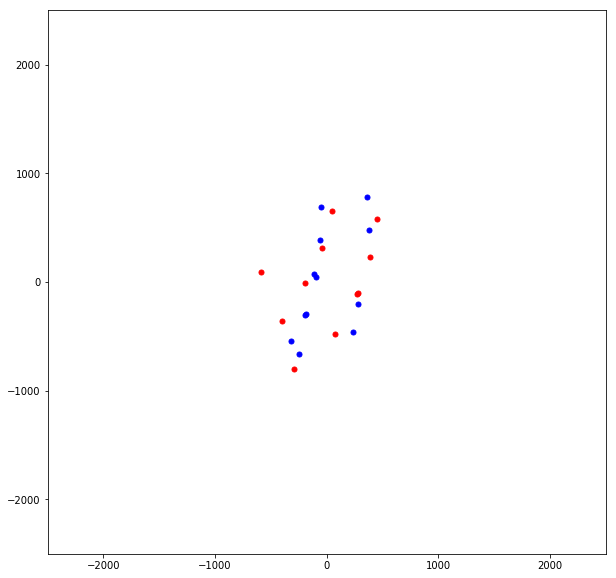

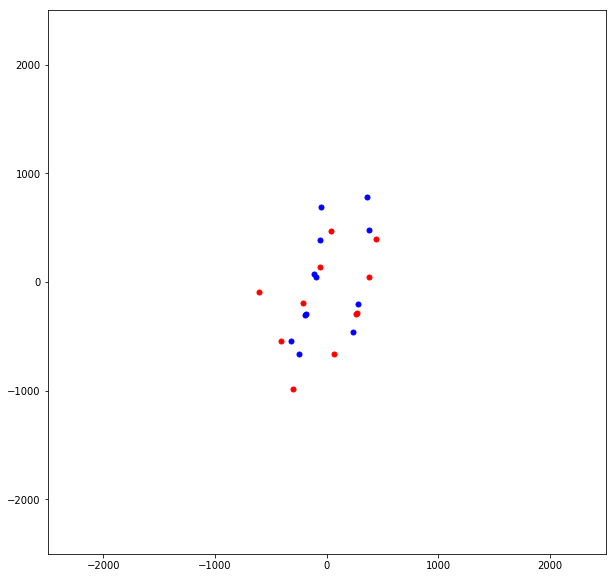

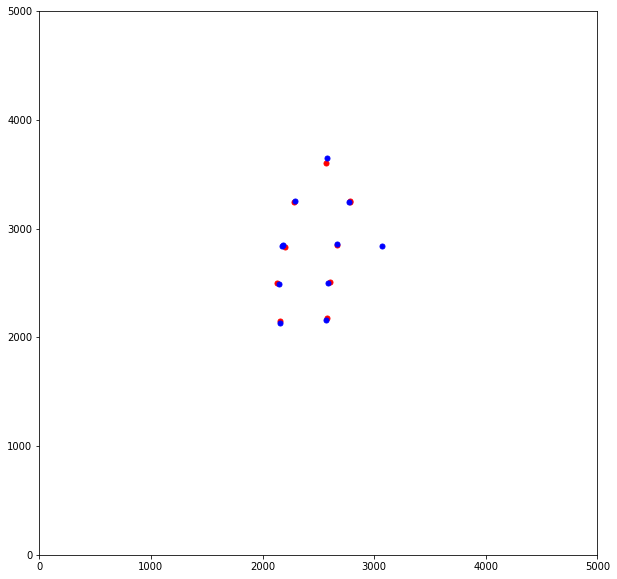

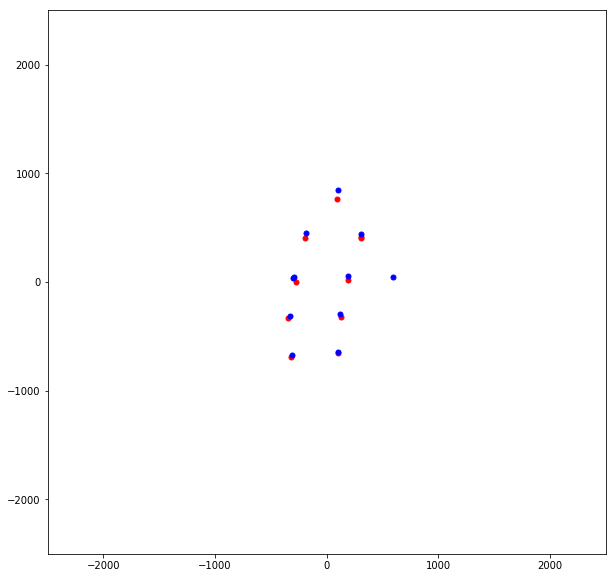

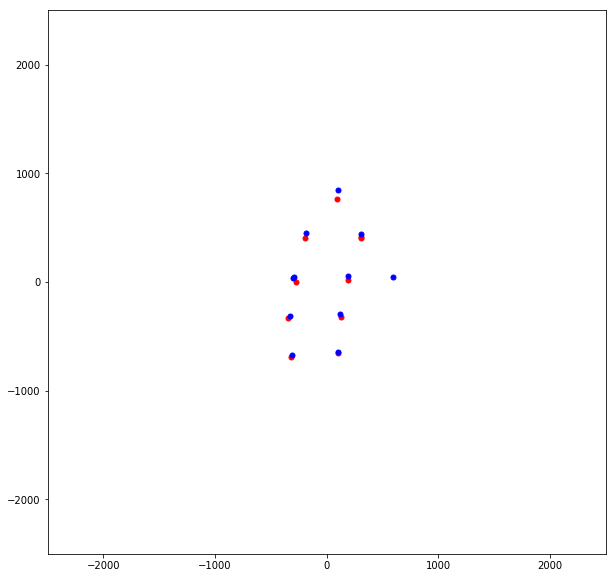

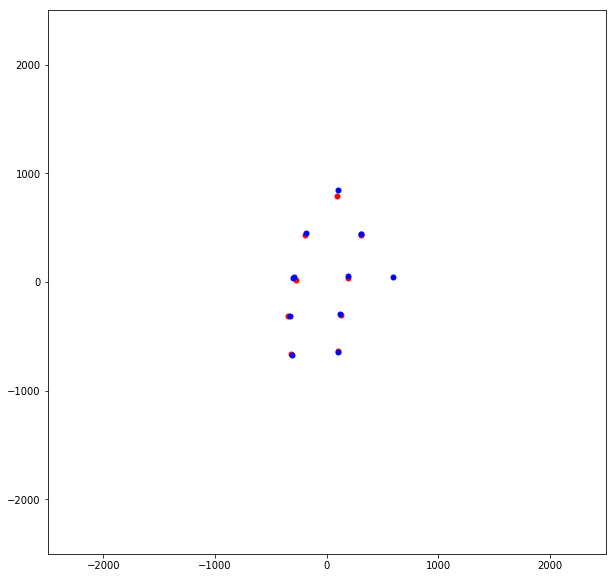

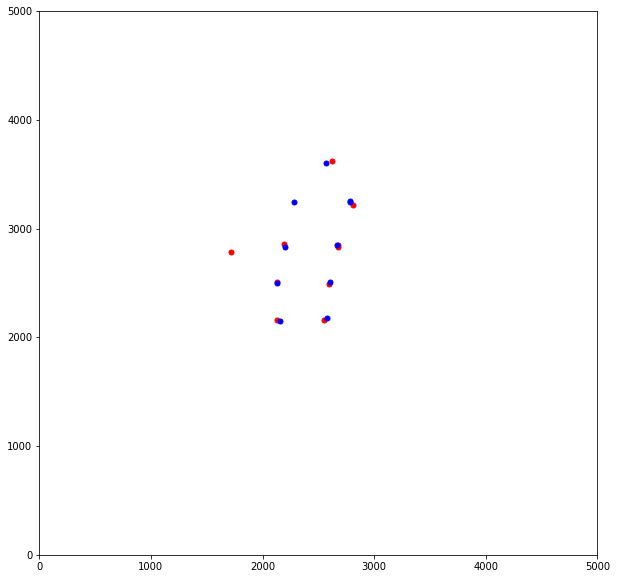

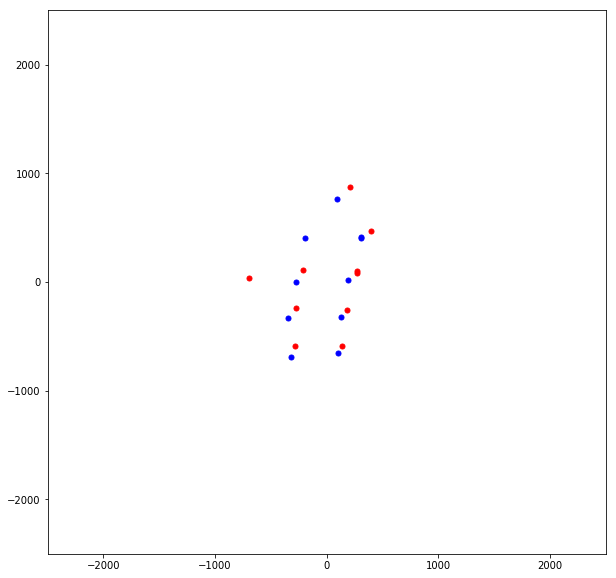

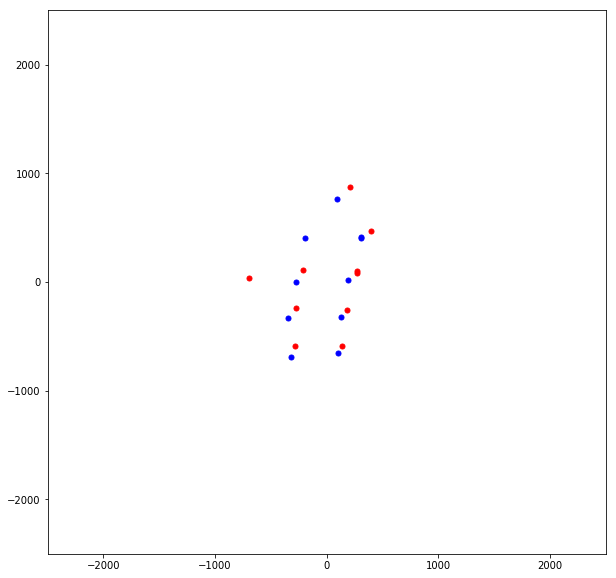

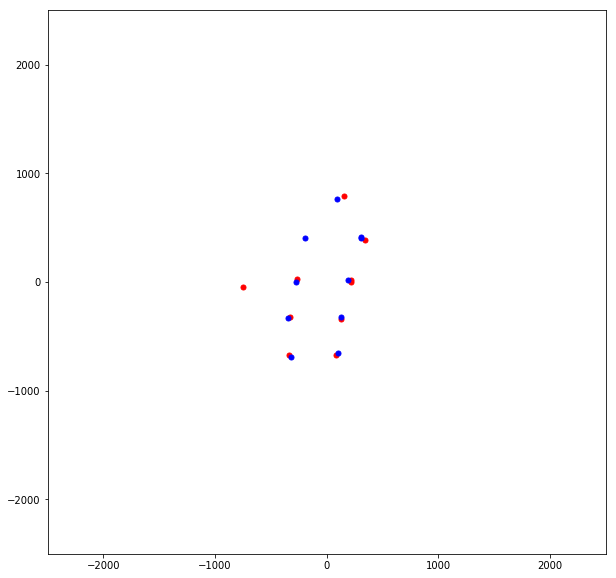

In [257]:
# TODO HERE remove outliers, doubled points first



#get rotation matrix

# get centroid for firs, subtract mean, get centroid for second, subtract mean,
#  iterate over rotations to minimze diffeces between centroid and nearest centroid from prev

# plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0030.tif')
# plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0031.tif')

rot = {}
sorted_keys = sorted(sd)

for ki in range(len(sorted_keys)-1):
    # get centroids, and centroids shifted so mean point is at origin
    centroids = [[],[]]
    shifted_centroids = [[],[]]
    for i in range(2):
        s = sd[sorted_keys[ki+i]]
        # mean of centroids
        csum = [0,0]       
        for f in s.itervalues():
            centroids[i].append(f['centroid'])
            csum[0] = csum[0]+f['centroid'][0]
            csum[1] = csum[1]+f['centroid'][1]
        cavg = [csum[0]/len(centroids[i]), csum[1]/len(centroids[i])]

        for c in centroids[i]:
            shifted_centroids[i].append((c[0]-cavg[0], c[1]-cavg[1]))
    plot_centroids(centroids[0], centroids[1], shifted=False)
    plot_centroids(shifted_centroids[0], shifted_centroids[1])
    # get ballpark of correct rotation
    error = []
    #iteratate over each rotation
    for r in range(0, 361):
        rot = rotate_by_deg(shifted_centroids[1], r)
#         cd = cdist(shifted_centroids[0], shifted_centroids[1])
        cd = cdist(shifted_centroids[0], rot)
        min_cols = cd.min(axis=0)   # closest point to each centroid from first slice in second slice
        min_rows = cd.min(axis=1)   # closest point in first slice to all points in second slice
        for _ in range(2):
            min_cols = min_cols[np.where(min_cols != max(min_cols))]
            min_rows = min_rows[np.where(min_rows != max(min_rows))]
        error.append(np.median(min_cols) + np.median(min_rows))
    
    r = error.index(min(error))
    rot = rotate_by_deg(shifted_centroids[1], r)
    
    plot_centroids(shifted_centroids[0], rot)
    
    error = []
    xy_shift = []
    for x in range(-250, 250):
        for y in range(-250, 250):
            trans = translate(rot, x, y)
            cd = cdist(shifted_centroids[0], trans)
            min_cols = cd.min(axis=0)   # closest point to each centroid from first slice in second slice
            min_rows = cd.min(axis=1)   # closest point in first slice to all points in second slice
            error.append(np.median(min_cols) + np.median(min_rows))
            xy_shift.append([x,y])

    idx = error.index(min(error))
    pt = xy_shift[idx]
    trans = translate(rot, pt[0],pt[1])
    plot_centroids(shifted_centroids[0], trans)

    
    
    
    # refine rotion and translation by not including centroids that don't show up in both images    
#     pick rotation with smallest error
#     temporarily remove points with no corresponding point in other slice
#     remove centroids that are too close to each other
#     find new center, rot again
#     translate one image by amount that would make centers line up

[ 302.25835239  302.25835239  333.26466     347.24249174  333.26466
  162.52548034   18.40003447   18.40003447    3.0864297   227.23494362
    3.0864297   227.23494362]
[10, 11, 12, 14]
(2774L, 2621L, 2937L, 2773L)
[ 222.87440409]
(2827L, 2656L, 2906L, 2752L)
[ 124.32618389]
(3146L, 2763L, 3302L, 2862L)
[ 184.76200908]
(3176L, 2790L, 3292L, 2899L)
[ 159.17600322]


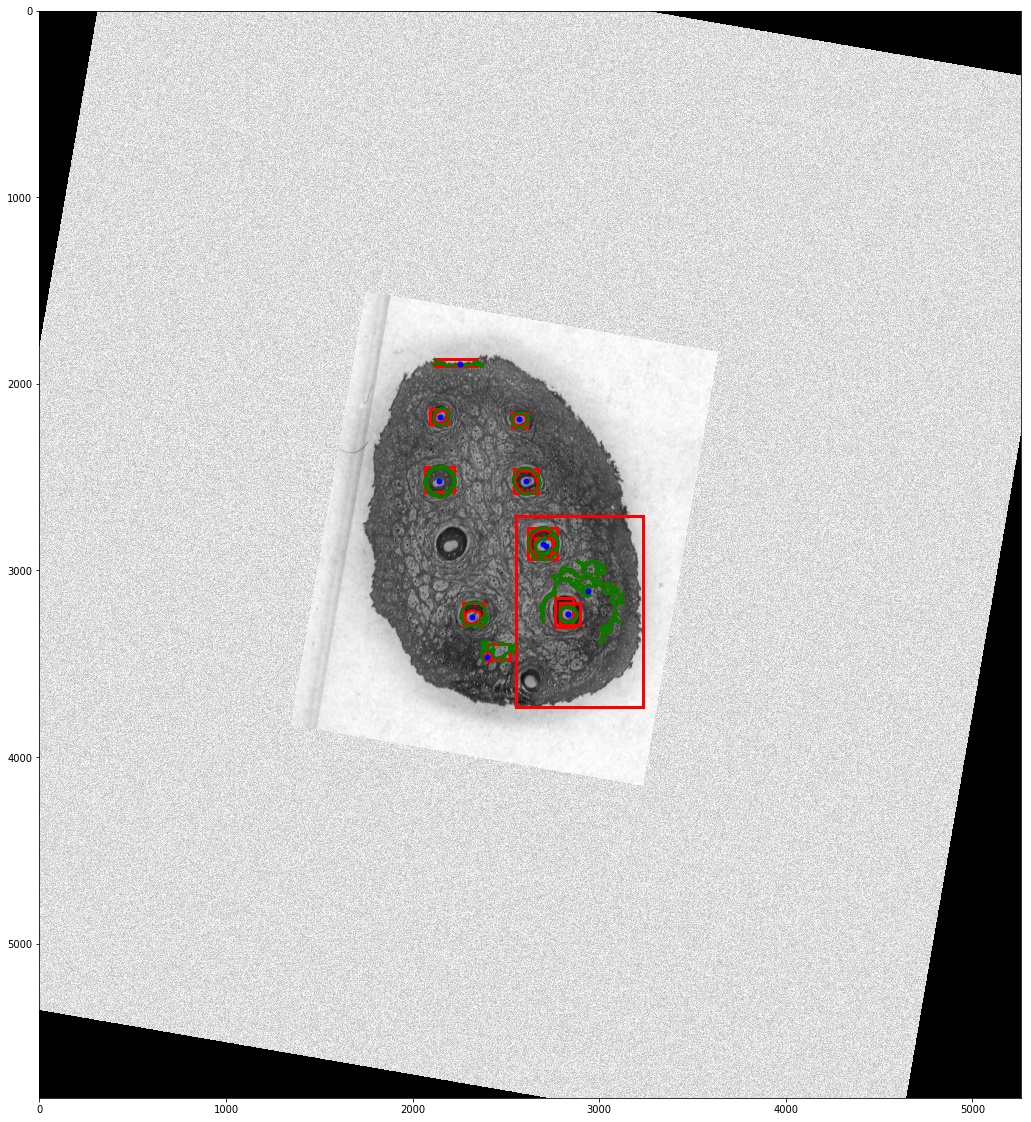

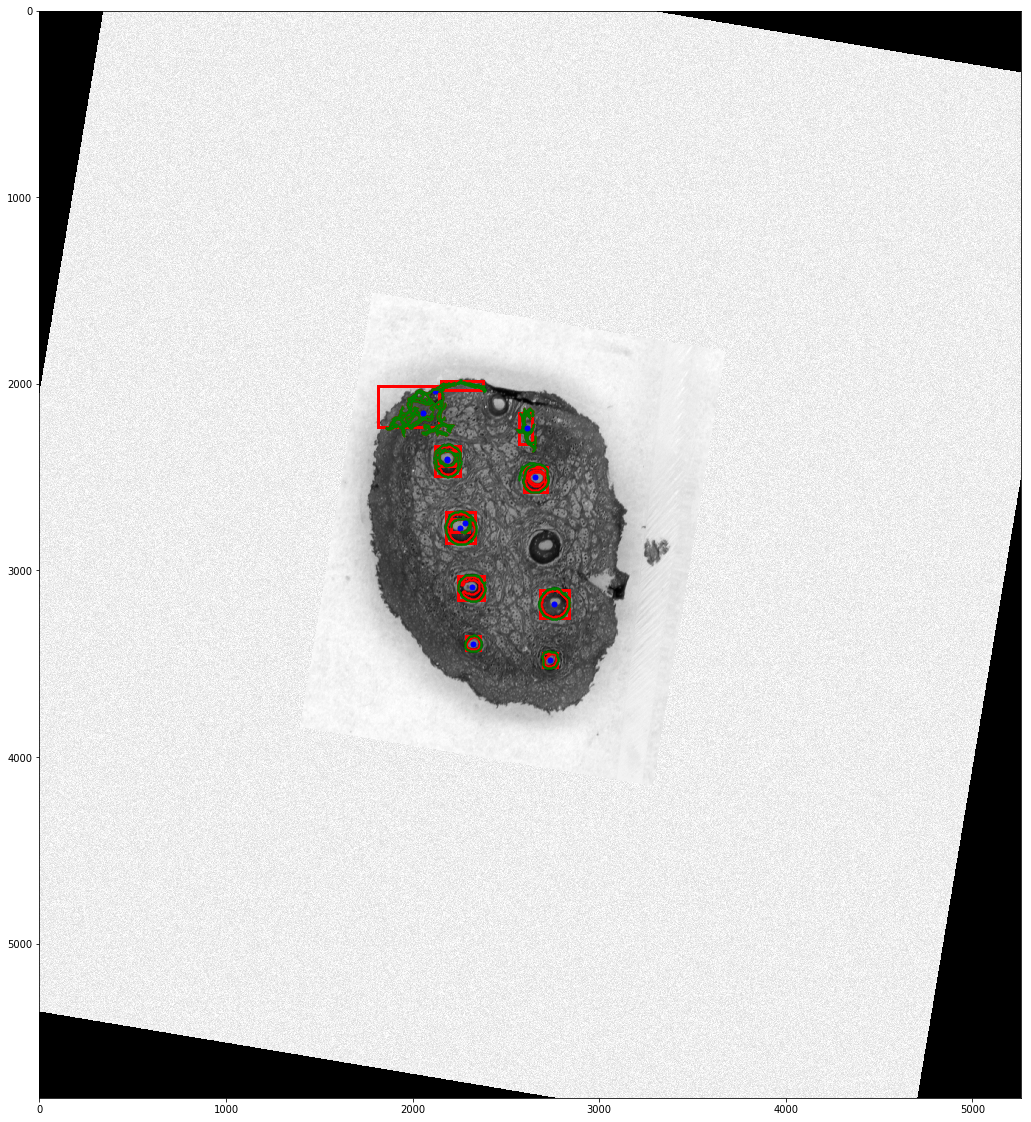

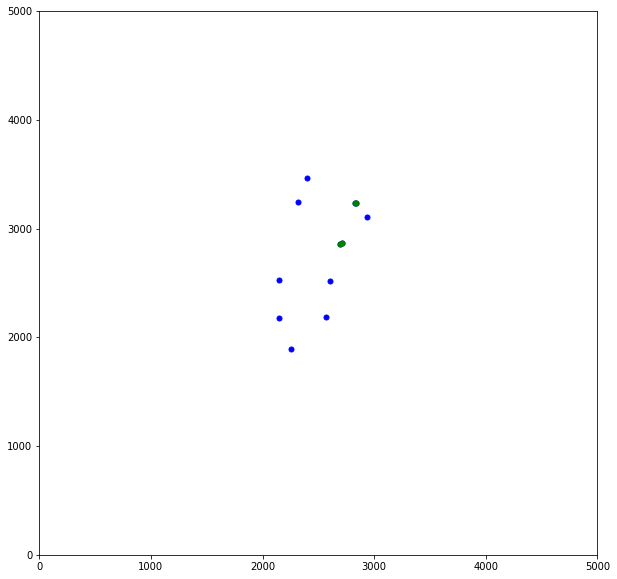

[ 140.13472677  140.13472677  269.53890255    8.73991878    8.73991878
  269.53890255   32.49791234   32.49791234  304.50018261  302.27014705
  304.50018261  302.27014705]
[4, 5, 8, 9]
(2333L, 2121L, 2492L, 2252L)
[ 206.01456259]
(2360L, 2142L, 2438L, 2226L)
[ 114.62983905]
(2689L, 2181L, 2853L, 2337L)
[ 226.34486961]
(2724L, 2206L, 2795L, 2305L)
[ 121.82774725]


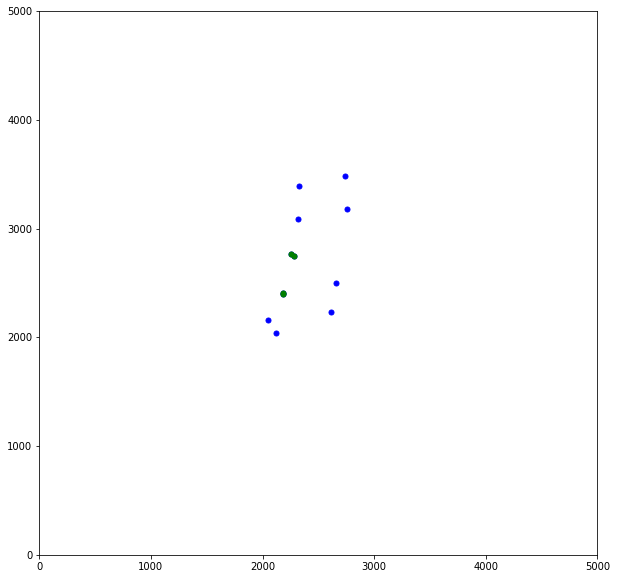

[ 360.49762829  348.83233195  407.31979481  345.1526949   348.83233195
   16.12105883  361.789526     16.12105883  404.35185698  419.1622875
  452.56293024]
[8, 10]
(2758L, 2113L, 2917L, 2264L)
[ 219.27608169]
(2816L, 2140L, 2892L, 2228L)
[ 116.27553483]


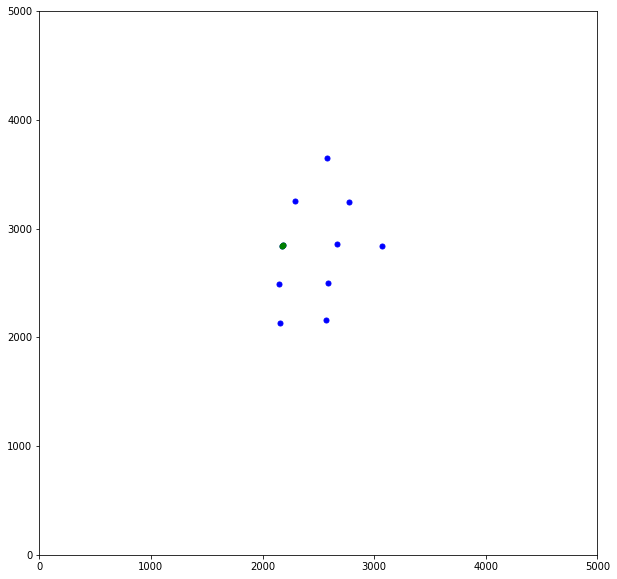

[ 352.23892778  332.08166048  337.07134176  332.08166048  337.07134176
  347.75984406   13.15438275  418.28051681   13.15438275  408.62252879]
[12, 16]
(3153L, 2711L, 3328L, 2856L)
[ 227.26636355]
(3211L, 2744L, 3291L, 2831L)
[ 118.19052415]


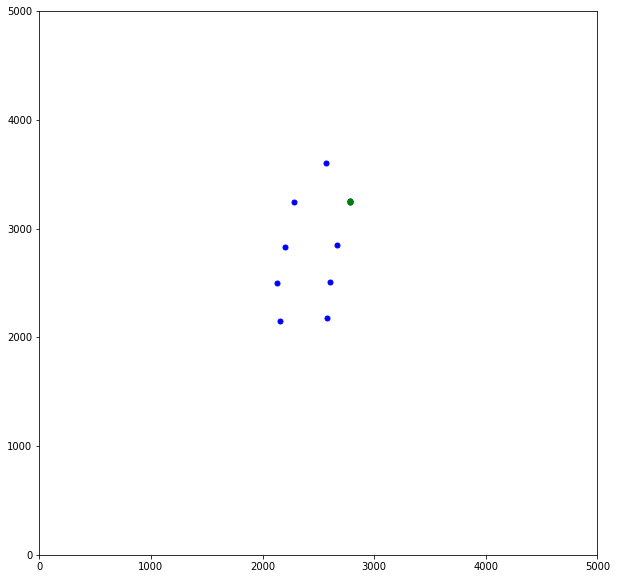

In [244]:
# TODO HERE remove outliers, doubled points first



#get rotation matrix

# get centroid for firs, subtract mean, get centroid for second, subtract mean,
#  iterate over rotations to minimze diffeces between centroid and nearest centroid from prev

plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0030.tif')
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0031.tif')

min_dist = 50

rot = {}
s_keys = sorted(sd)

for ki in range(len(s_keys)-1):
    # get centroids, and centroids shifted so mean point is at origin
    centroids = [[],[]]
    shifted_centroids = [[],[]]
    c_keys = [[],[]]
    for i in range(2):
        s = sd[sorted_keys[ki+i]]
        f_keys = sorted(s)
        for f in f_keys:
            centroids[i].append(s[f]['centroid'])
            c_keys[i].append(f)
#             print(c_keys[i])
    
    
    
    # closest point
    cp = cdist(centroids[0], centroids[0])
    # remove diagonal entries (self distance), reshape to square array
    cp = cp[~np.eye(cp.shape[0],dtype=bool)].reshape(cp.shape[0],-1) 
    cp = cp.min(axis=1)
    
    
    
    print(cp)
    
    too_close = []
    close_keys = []
    s = sd[sorted_keys[ki]]
    for i in range(len(cp)):
        if cp[i] < min_dist:
#             print(cp[i])
            close_keys.append(c_keys[0][i])
    print(close_keys)  
    for c in close_keys:
        too_close.append(s[c]['centroid'])
        print(s[c]['bbox'])
        print(pdist([[s[c]['bbox'][0],s[c]['bbox'][1]],[s[c]['bbox'][2],s[c]['bbox'][3]]]))
    plot_centroids(points1=centroids[0], too_close=too_close, shifted=False)
    
    
    # if one is completely inside of other, use outside, else use one with more points on outer ellipse
    
    
    
    
#     cd = cdist(centroids[0], centroids[1])
#     min_rows = cd.min(axis=1)   # closest point in first slice to all points in second slice
#     min_cols = cd.min(axis=0)   # closest point to each centroid from first slice in second slice

    
#     print(min_rows)
#     print(min_cols)
    
    
    
#     c = cdist(centroids[0], centroids[1])
#     plot_centroids(centroids[0], centroids[1], False)
    
    
    
    
    
    
    
#     print min(p[0])
#     print min(p[1])
#     print np.median(p[0])
#     print np.median(p[1])
#     print c.min()
#     print c.max()
#     print np.median(c)
    
    
#     for i in range(2):
#         s = sd[sorted_keys[ki+i]]
#         # mean of centroids
#         csum = [0,0]       
#         for f in s.itervalues():
#             centroids[i].append(f['centroid'])
#             csum[0] = csum[0]+f['centroid'][0]
#             csum[1] = csum[1]+f['centroid'][1]
#         cavg = [csum[0]/len(centroids[i]), csum[1]/len(centroids[i])]

#         for c in centroids[i]:
#             shifted_centroids[i].append((c[0]-cavg[0], c[1]-cavg[1]))
#     plot_centroids(centroids[0], centroids[1], False)
#     plot_centroids(shifted_centroids[0], shifted_centroids[1])
#     # get ballpark of correct rotation
#     error = []
#     #iteratate over each rotation
#     for r in range(0, 361):
#         rot = rotate_by_deg(shifted_centroids[1], r)
# #         cd = cdist(shifted_centroids[0], shifted_centroids[1])
#         cd = cdist(shifted_centroids[0], rot)
#         min_cols = cd.min(axis=0)   # closest point to each centroid from first slice in second slice
#         min_rows = cd.min(axis=1)   # closest point in first slice to all points in second slice
#         error.append(np.median(min_cols) + np.median(min_rows))
    
#     r = error.index(min(error))
#     rot = rotate_by_deg(shifted_centroids[1], r)
    
#     plot_centroids(shifted_centroids[0], rot)
    
    
    # refine rotion and translation by not including centroids that don't show up in both images    
#     pick rotation with smallest error
#     temporarily remove points with no corresponding point in other slice
#     remove centroids that are too close to each other
#     find new center, rot again
#     translate one image by amount that would make centers line up

In [97]:
sd = load_fol_data(r'C:\Users\guru\Desktop\follicle_tracking\Pad2_follicles_sd.pckl')

In [98]:
a = { your_key: sd[your_key] for your_key in range(30,35) }

In [99]:
pickle.dump( a, open( r'C:\Users\guru\Desktop\follicle_tracking\my.pckl', 'w' ) )

In [ ]:
# 30,31,32 sequence where one gets flipped

In [ ]:
len(sd[137])

In [ ]:
plot_all_fols(sd, r'C:\Users\guru\Desktop\follicle_tracking\pad2_2018_registered\regPad2_2018_0030.tif')

In [95]:
sd = load_fol_data(r'C:\Users\guru\Desktop\follicle_tracking\Pad2_follicles_sd.pckl')

In [ ]:
(int)(len(sd.keys())/2)

In [ ]:
dist(sd[110][10]['centroid'],sd[110][12]['centroid'])

In [ ]:
a = sd[110][10]['centroid']
b = sd[110][19]['centroid']

In [ ]:
print a,b

In [ ]:
((a[0]-b[0])**2 + (a[1]-b[1])**2)**(0.5)

In [ ]:
((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [ ]:
4**(1/2)

In [ ]:
a = { your_key: sd[your_key] for your_key in range(30,33) }

In [ ]:
a.keys()

In [ ]:
(int)(len(sd.keys())/2)

In [ ]:
sd[110][10]

In [ ]:
sd[110][10]['centroid'][0]

In [ ]:
pickle.dump( a, open( r'C:\Users\guru\Desktop\follicle_tracking\my.pckl', 'w' ) )

In [ ]:
sd = load_fol_data(r'C:\Users\guru\Desktop\follicle_tracking\my.pckl')

In [ ]:
sd[110][10]['centroid']

In [ ]:
c = []
for k in sd.keys():
    for k2 in sd[k].keys():
        if 'centroid' in sd[k][k2].keys():
            c.append(sd[k][k2]['centroid']) 

In [ ]:
c[0]

In [ ]:
sd[1]